# Question 1

Q1. Given: Matrix A, dimensions=(n,k)
           Matrix B, dimensions=(k,m)
    To find: Total no. of multiplications and additions in A X B.
    Solution: Let C=A X B
              dim(C)=(n,m)
              Ci,j=(Ai,l.Bl,j)from l=1,k
              For each element in C, we have to multiply elements of rows of A with corressponding elements in columns of 
              B. Hence, total no of multiplications for first element of C will be k and no. of additions will be 
              k-1. Since C has m columns, hence no. of elements in the first row of C will be m. For each element, we have k 
              multiplications and k-1 additions. Thus 
              No. of multiplications for first row of C=k+k+k.....m times= k*m
              No. of additions for first row of C      = (k-1)+(k-1)+.....m times= (k-1)*m
              C has n rows. For 1 row, km multiplications and (k-1)m additions. For n rows,
              No. of multiplications= k*m*n
              No. of additions= (k-1)*m*n
              Hence, for multiplications of two matrices A and B of dimensions (n,k) and (k,m), total of additions required are
              (k-1)mn and total multiplications required are kmn. total multiplications+additions=(2k-1)mn

In [8]:
!pip install numpy

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.9 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.3 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.3/16.3 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.6/16.3 MB 3.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/16.3 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.3 MB 4.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/16.3 MB 4.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/16.3 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/16.3 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/16.3 MB 5.1 MB/s eta 0:00:03
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Question 2

In [9]:
# Q2
# I am making a function which calculates the multiplication of two matrices A and B
import time
import numpy as np

def matrix_multi(A,B):
    n=len(A)           #no. of rows in A
    k=len(A[0])        #no. of columns in A, same as no of rows in B
    m=len(B[0])        #no. of columns in B
    C=[[0 for i in range(m)]for j in range(n)]        #creating an empty 2D list C for storing the values of A X B.
                                                        # I have used the list comprehension method to create the list which has 0's in it.
    for p in range(n):
        for q in range(m):
            for r in range(k):
                C[p][q]+=A[p][r]*B[r][q]
    return C


A = np.random.rand(40, 50)
B = np.random.rand(50, 40)

t1=time.time()
x=matrix_multi(A,B)
t2=time.time()
del_t=t2-t1

print("Time taken using list of lists: %.6f seconds" %del_t)


#Using numpy 
A_np=np.array(A)
B_np=np.array(B)
t1_np=time.time()
C_np=np.dot(A_np,B_np)
t2_np=time.time()
del_t_np=t2_np-t1_np

print("Time taken using numpy: %.6f seconds" %del_t_np)


Time taken using list of lists: 0.087168 seconds
Time taken using numpy: 0.000000 seconds


We see that after running the code, the time taken for calculating the multiplication using the function matrix_multi is 0.083000 seconds and from using numpy, it is still 0.001000 seconds. This is because in numpy,for calculating the values of elements of C, the function np.dot uses multiple CPU cores parrallely to multiply the corresponding elements of matrices A and B and add the results. This is called vectorization. Whereas, in the function matrix_multi, the calculation for the elements of C is carried out by first multiplying one element of A with corresponding element of B at a time and then adding it to a variable. We repeat this this process until all the elements of C are calculated. Hence, crucial difference in using numpy and the function matrix_multi is that in former, we use multiple CPU cores to carry out calculation, which makes the process faster. For small matrices, the computation time is roughly the same, but for large matrices, considerable difference computation time can be noticed.

# Question 4

f(x,y)=x2*y+ y3sin(x)
df/dx=2xy+y3cos(x)
df/dy=x2+3y2sin(x)
gradient(f)=(2xy+y3cos(x),x2+3y2sin(x))

# Question 5

In [10]:
!pip install jax jaxlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 2.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/2.0 MB 2.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.0 MB 2.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 3.0 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.0 MB 3.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.0 MB 3.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.1/2.0 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.0 MB 3.5 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:


import jax
import jax.numpy as jnp
import numpy as np

def f(x,y):                            #defining the function
    return x**2*y+y**3*jnp.sin(x)

grad_f=jax.grad(f,(0,1))                 # for calculating gradient using jax

def analytical_grad(x,y):                #calculating gradient analytically
    df_dx=2*x*y+y**3*jnp.cos(x)
    df_dy=x**2+3*y**2*jnp.sin(x)
    return df_dx, df_dy
np.random.seed(0)
x_values=np.random.rand(5)
y_values=np.random.rand(5)
for x, y in zip(x_values, y_values):
    print(f"x and y values are:{x,y}")
    jax_grad = grad_f(x, y)
    analytic_grad = analytical_grad(x, y)
    print(f"x:{x:.4f},y:{y:.4f}")
    print(f"Jax grad:{jax_grad}")
    print(f"Analytical Grad:{analytic_grad}")
   


x and y values are:(np.float64(0.5488135039273248), np.float64(0.6458941130666561))
x:0.5488,y:0.6459
Jax grad:(Array(0.93883353, dtype=float32), Array(0.95409256, dtype=float32))
Analytical Grad:(Array(0.93883353, dtype=float32), Array(0.9540925, dtype=float32))
x and y values are:(np.float64(0.7151893663724195), np.float64(0.4375872112626925))
x:0.7152,y:0.4376
Jax grad:(Array(0.68917453, dtype=float32), Array(0.88819575, dtype=float32))
Analytical Grad:(Array(0.6891746, dtype=float32), Array(0.8881959, dtype=float32))
x and y values are:(np.float64(0.6027633760716439), np.float64(0.8917730007820798))
x:0.6028,y:0.8918
Jax grad:(Array(1.6592677, dtype=float32), Array(1.7158709, dtype=float32))
Analytical Grad:(Array(1.6592677, dtype=float32), Array(1.7158709, dtype=float32))
x and y values are:(np.float64(0.5448831829968969), np.float64(0.9636627605010293))
x:0.5449,y:0.9637
Jax grad:(Array(1.8154762, dtype=float32), Array(1.7408998, dtype=float32))
Analytical Grad:(Array(1.8154762, 

# Question 6

In [12]:
!pip install sympy


   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 330.3 kB/s eta 0:00:19
   ---------------------------------------- 0.1/6.2 MB 409.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/6.2 MB 602.4 kB/s eta 0:00:11
   -- ------------------------------------- 0.3/6.2 MB 1.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/6.2 MB 2.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.8/6.2 MB 2.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.1/6.2 MB 2.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.4/6.2 MB 3.2 MB/s eta 0:00:02
   ---------- ----------------------------- 1.6/6.2 MB 3.5 MB/s eta 0:00:02
   ------------ --------------------------- 1.9/6.2 MB 3.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.2/6.2 MB 3.8 MB/s eta 0:00:02
   --------------- -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sympy as sp
x,y=sp.symbols('x y')             #for defining x and y
f_x_y=(x**2)*y+(y**3)*sp.sin(x)   # defining function
d_dx=sp.diff(f_x_y,x)            #for computing partial derivatives
d_dy=sp.diff(f_x_y,y)
x_value=0.5488
y_value=0.6459
d_dx_val=d_dx.subs({x:x_value, y:y_value})
d_dy_val=d_dy.subs({x:x_value,y:y_value})

print(f"x:{x_value}, y:{y_value}")
print(f"SymPy gradient with respect to x: {d_dx_val}")
print(f"SymPy gradient with respect to y: {d_dy_val}")

# Question 7

In [4]:
students_record={
    "2022":{
        "Branch 1":{
            "Roll no.":'1',
            "Name":"N",
            "Marks":{
                "Maths":100,
                "English":70 } }, "Branch 2":{} },
    "2023":{"Branch 1":{},"Branch 2":{} },
    "2024":{ "Branch 1":{},"Branch 2":{} },
    "2025":{
        "Branch 1":{},
        "Branch 2":{}
        
    }
}

In [47]:
class Student:
    def __init__(self, roll_number, name, marks):
        
        self.roll_number=roll_number
        self.name=name
        self.marks=marks
class Year:
    def __init__(self, year):
        self.year=year
        self.branches=[]
class Data:
    def __init__(self):
        self.years=[]
    def add_year(self, year):
        self.years.append(year)    
    
class Branch:
    def __init__(self,name):
        self.name=name
        self.students=[]
             
y22=Year(2022)
y23=Year(2023)
y24=Year(2024)
y25=Year(2025)


b1_22=Branch("Branch 1")
b2_22=Branch("Branch 2")
b1_23=Branch("Branch 1")
b2_23=Branch("Branch 2")
b1_24=Branch("Branch 1")
b2_24=Branch("Branch 2")
b1_25=Branch("Branch 1")
b2_25=Branch("Branch 2")

student1=Student(1,"N",{"Maths":100, "Eng":70})
b1_22.students.append(student1)
y22.branches.append(b1_22)
print(year)


    

In [17]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 495.5 kB/s eta 0:00:01
     --------------- --------------------- 71.7/165.9 kB 563.7 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 476.3 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9 kB 655.8 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.9


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


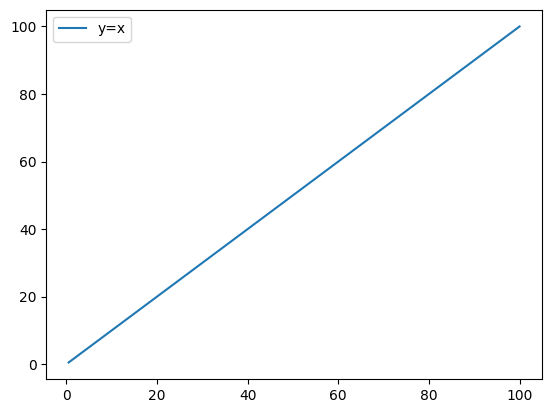

In [23]:
import matplotlib.pyplot as plt
x=np.arange(0.5,100.5,0.5)
plt.plot(x,x,label="y=x")
plt.legend()


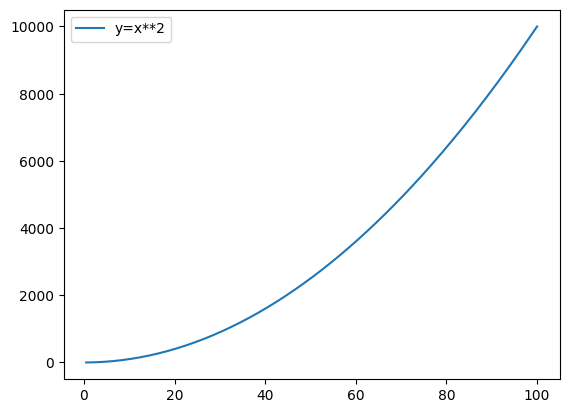

In [22]:

plt.plot(x,x**2,label="y=x**2")
plt.legend()


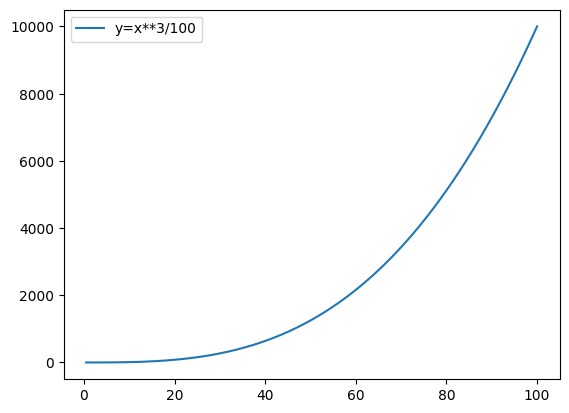

In [24]:
plt.plot(x,(x**3)/100,label="y=x**3/100")
plt.legend()


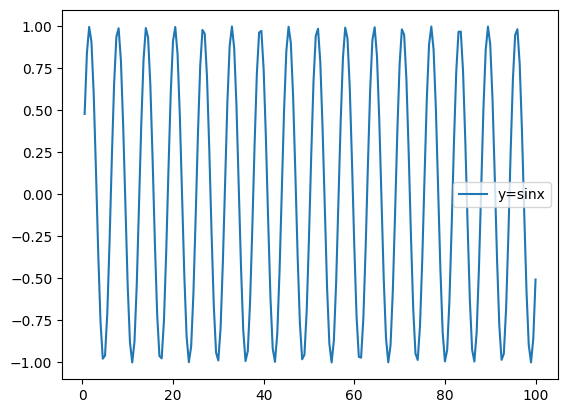

In [26]:
plt.plot(x,np.sin(x),label="y=sinx")
plt.legend()


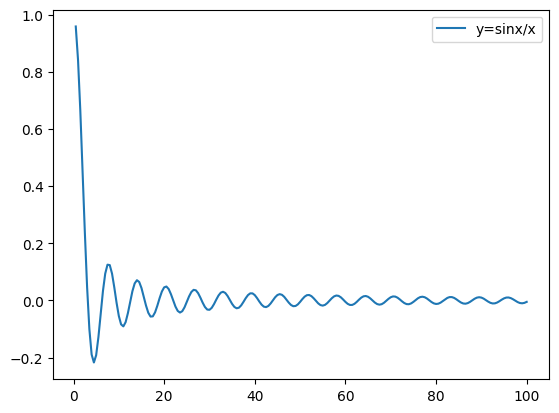

In [28]:
plt.plot(x,(np.sin(x))/x,label="y=sinx/x")
plt.legend()


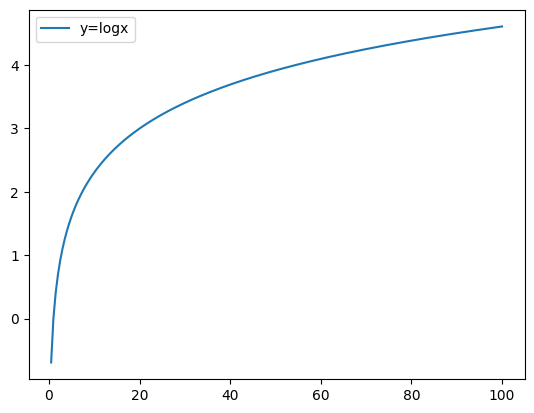

In [29]:
plt.plot(x,(np.log(x)),label="y=logx")
plt.legend()


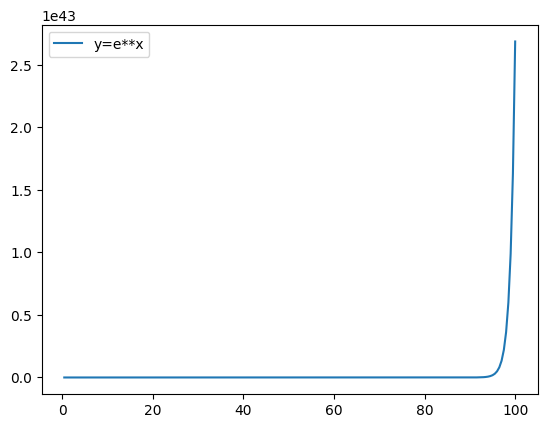

In [30]:
plt.plot(x,(np.exp(x)),label="y=e**x")
plt.legend()


Question 10

In [31]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 435.7 kB/s eta 0:00:27
   ---------------------------------------- 0.0/11.5 MB 326.8 kB/s eta 0:00:36
   ---------------------------------------- 0.0/11.5 MB 326.8 kB/s eta 0:00:36
   ---------------------------------------- 0.0/11.5 MB 326.8 kB/s eta 0:00:36
   ---------------------------------------- 0.1/11.5 MB 217.9 kB/s eta 0:00:53
   ---------------------------------------- 0.1/11.5 MB 254.2 kB/s eta 0:00:45
   ---------------------------------------- 0.1/11.5 MB 254.2 kB/s eta 0:00:45
   ---------------------------------------- 0.1/11.5 MB 238.1 kB/s eta 0:00:48
   ---------------------------------------- 0.1/11.5 MB 238.1 kB/s eta 0:00:48
   ---------------------------------------- 0.1/11.5 MB 262.0 kB/s eta 0:00:44
    --------------------------------------- 0.2/11.5 MB 297.7 kB/s eta


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
mat=np.random.uniform(1, 2, size=(20, 5))     #creating mtrix
data_frame=pd.DataFrame(mat,columns=["a","b","c","d","e"])    #creating dataframe
maxsdc=data_frame.std().idxmax()                               #calculating max sd among columns
minavgr=data_frame.mean(axis=1).idxmin()                       #calculating min mean among rows
print("dataframe:")
print(data_frame)
print(f"column with max std:{maxsdc}")
print(f"row with min. mean:{minavgr}")

dataframe:
           a         b         c         d         e
0   1.990339  1.216897  1.663078  1.263322  1.020651
1   1.758379  1.320017  1.383464  1.588317  1.831048
2   1.628982  1.872651  1.273542  1.798047  1.185636
3   1.952792  1.687488  1.215508  1.947371  1.730856
4   1.253942  1.213312  1.518201  1.025663  1.207470
5   1.424685  1.374170  1.463575  1.277629  1.586784
6   1.863856  1.117532  1.517379  1.132068  1.716860
7   1.396060  1.565421  1.183280  1.144848  1.488056
8   1.355613  1.940432  1.765325  1.748664  1.903720
9   1.083422  1.552192  1.584476  1.961936  1.292148
10  1.240829  1.100294  1.016430  1.929529  1.669917
11  1.785153  1.281730  1.586410  1.063955  1.485628
12  1.977495  1.876505  1.338159  1.961570  1.231702
13  1.949319  1.941378  1.799203  1.630448  1.874288
14  1.293020  1.848944  1.617877  1.013237  1.347234
15  1.148141  1.981829  1.478370  1.497391  1.639473
16  1.368585  1.136900  1.822118  1.189848  1.511319
17  1.224317  1.097844  1.862192  1

Question 11

In [40]:
data_frame['f']=data_frame[['a','b','c','d','e']].sum(axis=1)          #adding f
data_frame['g']=['LT8' if x<8 else 'GT8' for x in data_frame['f']]     #adding g
rowslt8=data_frame[data_frame['g']=='LT8'].shape[0]                    #A/Q
stdflt8= data_frame[data_frame['g']=='LT8']['f'].std()
stdfgt8=data_frame[data_frame['g']=='GT8']['f'].std()
print("Number of rows where 'g' is 'LT8':",rowslt8)
print("Standard deviation of 'f' for 'LT8':",stdflt8 )
print("Standard deviation of 'f' for 'GT8':",stdfgt8)

Number of rows where 'g' is 'LT8': 15
Standard deviation of 'f' for 'LT8': 0.5054804096217345
Standard deviation of 'f' for 'GT8': 0.4026663575336598


In [ ]:
Question 12
Broadcasting is a feature of numpy which allows arithematic operations on matrices of different sizes.

In [42]:
A=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])
B=np.array([10,11,12])
C=A+B
print("Matrix A:",A)
print("Matrix B:",B)
print("A+B=",C)

Matrix A: [[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix B: [10 11 12]
A+B= [[11 13 15]
 [14 16 18]
 [17 19 21]]


In [61]:


!jupyter nbconvert --to html mlprerequisitec.ipynb

[NbConvertApp] Converting notebook mlprerequisitec.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 637861 bytes to mlprerequisitec.html
